In [15]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [48]:
#Import the dataset. 
soccer = pd.read_csv("/Users/pstern/Desktop/INDE-577/Datasets/soccer_stats.csv", encoding='ISO-8859-1', delimiter=';')

# Filter the data such that we are only including players who have player more than 10 games worth of time.
soccer = soccer[soccer['90s'] >= 10.0]

# Filter to only include forwards and defenders.
data = soccer[(soccer['Pos'] == 'FW') | (soccer['Pos'] == 'DF')]

# Get the forwards and defenders.
forward = data[data['Pos'] == 'FW']
defender = data[data['Pos'] == 'DF']

# Get the goals for forwards and defenders to use as a predictor.
fw_goals = forward['Goals'].values
df_goals = defender['Goals'].values

# Select clearances as a predictor.
fw_clr = forward['Clr'].values
df_clr = defender['Clr'].values

# Get the data for our model
predictors = data[['Goals', 'Clr']].values
response = [[int(val)] for val in (data['Pos'] == 'FW')]

# Split the data into training and testing sets.
train_p, test_p, train_r, test_r = train_test_split(predictors, response, test_size = 0.4, random_state = 42)

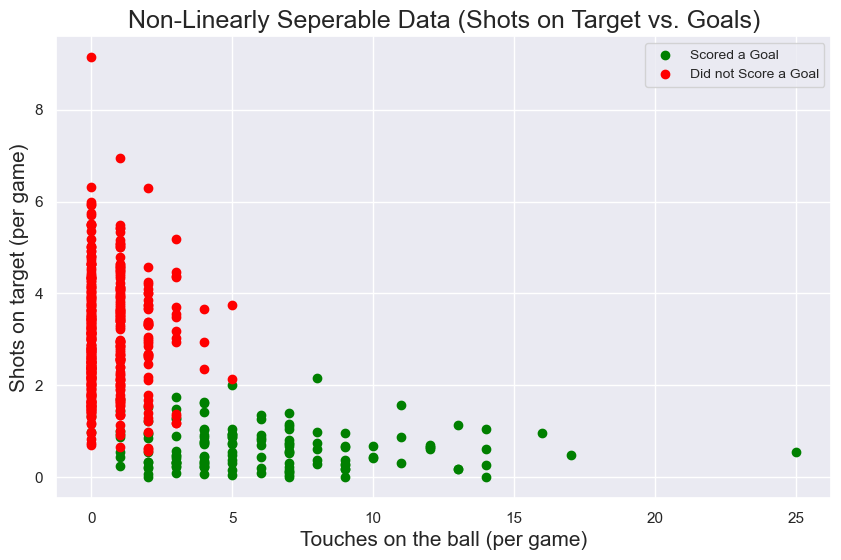

In [49]:
# Set the theme. 
sns.set_theme()

plt.figure(figsize = (10, 6))

# Add the red card players to the plot.
plt.scatter(fw_goals, fw_clr, color = "green", label = "Scored a Goal")

# Add the non red card players to the plot.
plt.scatter(df_goals, df_clr, color = "red", label = "Did not Score a Goal")
plt.xlabel("Touches on the ball (per game)", fontsize = 15)
plt.ylabel("Shots on target (per game)", fontsize = 15)
plt.legend(fontsize = 10, loc = "upper right")
plt.title("Non-Linearly Seperable Data (Shots on Target vs. Goals)", fontsize = 18)
plt.show()